<a href="https://colab.research.google.com/github/Halilibrahim-Guc/Time_Series_Prediction_with_Dummy_Course_Enrollment_Data_Set/blob/main/Time_Series_Prediction_with_Dummy_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import OrdinalEncoder


In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/DUMMY VERİ SETİ  (Tamamlanmış) - Veri Seti Taslağı.csv')
df.head(601)

,Ders Kodu\n\nCourse Code,Ders Adı\n\nCourse Name,Dönem\n\nTerm,Yıl\n\nYear,Kalan Öğrenci Sayısı\n\nFail,Geçen Öğrenci Sayısı\n\nPass,Ön Koşul Ders(ler)ini Geçen Öğrenci Sayısı\n\nPrerequisite Pass,Hazırlık Okulunu Geçip Derse Kayıt Olabilecek Öğrenci Sayısı\n\nPrep School Pass,Önceki Notunu Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nRaise Grades,Not Ortalamasını Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nIncrease GPA,Dersi Alan Yan / Çift Anadal Öğrencilerin Sayısı\n\nMinor / Double Major,Ders Kayıtlı Öğrenci Sayısı\n\nEnrolled Students,Gelecek Dönem Dersi Alacak Öğrenci Sayısı Tahmini\n\nFuture Enroll
0,CMPE114,Computer Programming II,Fall,2003,30,96,100,0,6,10,1,126,NaN
1,CMPE114,Computer Programming II,Spring,2004,40,97,95,0,8,9,1,137,NaN
2,CMPE114,Computer Programming II,Summer,2004,0,0,0,0,0,0,0,0,NaN
3,CMPE114,Computer Programming II,Fall,2004,29,93,97,0,8,9,1,122,NaN
4,CMPE114,Computer Programming II,Spring,2005,27,96,95,0,8,9,0,123,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ISE 261,Business and e-Commerce,Spring,2022,0,0,0,0,0,0,0,0,NaN
596,ISE 261,Business and e-Commerce,Summer,2022,0,0,0,0,0,0,0,0,NaN
597,ISE 261,Business and e-Commerce,Fall,2022,8,51,0,2,3,1,2,59,NaN
598,ISE 261,Business and e-Commerce,Spring,2023,0,0,0,0,0,0,0,0,NaN


In [4]:
# Drop the empty column and rename the target column
df= df.drop(labels="Gelecek Dönem Dersi Alacak Öğrenci Sayısı Tahmini\n\nFuture Enroll",axis=1)
df.rename(columns = {'Ders Kayıtlı Öğrenci Sayısı\n\nEnrolled Students':'Target'}, inplace = True)

In [6]:
# Encode nominal categories
enc = OrdinalEncoder()
df['Ders Kodu\n\nCourse Code'] = enc.fit_transform(df[["Ders Kodu\n\nCourse Code"]])
df['Ders Adı\n\nCourse Name'] = enc.fit_transform(df[["Ders Adı\n\nCourse Name"]])
df['Dönem\n\nTerm'] = enc.fit_transform(df[["Dönem\n\nTerm"]])

df.head(601)

,Ders Kodu\n\nCourse Code,Ders Adı\n\nCourse Name,Dönem\n\nTerm,Yıl\n\nYear,Kalan Öğrenci Sayısı\n\nFail,Geçen Öğrenci Sayısı\n\nPass,Ön Koşul Ders(ler)ini Geçen Öğrenci Sayısı\n\nPrerequisite Pass,Hazırlık Okulunu Geçip Derse Kayıt Olabilecek Öğrenci Sayısı\n\nPrep School Pass,Önceki Notunu Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nRaise Grades,Not Ortalamasını Yükseltmek için Dersi Alan Öğrenci Sayısı\n\nIncrease GPA,Dersi Alan Yan / Çift Anadal Öğrencilerin Sayısı\n\nMinor / Double Major,Target
0,3.0,2.0,0.0,2003,30,96,100,0,6,10,1,126
1,3.0,2.0,1.0,2004,40,97,95,0,8,9,1,137
2,3.0,2.0,2.0,2004,0,0,0,0,0,0,0,0
3,3.0,2.0,0.0,2004,29,93,97,0,8,9,1,122
4,3.0,2.0,1.0,2005,27,96,95,0,8,9,0,123
...,...,...,...,...,...,...,...,...,...,...,...,...
595,5.0,1.0,1.0,2022,0,0,0,0,0,0,0,0
596,5.0,1.0,2.0,2022,0,0,0,0,0,0,0,0
597,5.0,1.0,0.0,2022,8,51,0,2,3,1,2,59
598,5.0,1.0,1.0,2023,0,0,0,0,0,0,0,0


In [7]:
# Extract the features and target variable from the DataFrame
X = df.iloc[:, :-1]
y = df[['Target']]
print(X.shape, y.shape)

(600, 11) (600, 1)


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

In [11]:
# Perform cross-validation to tune the hyperparameters of our model
params = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300, 400, 500]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [12]:
# Train the model on the training data
xgb_model = grid_search.best_estimator_
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
# Show the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}


In [14]:
# Evaluate the performance of the model on the test data using RMSE
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse)

RMSE: 0.828


In [32]:
# Calculate R-squared of regression model
print(xgb_model.score(X_test,y_test))
# Or using r2_score() function
R_square = r2_score(y_test, y_pred)
print('Coefficient of Determination', R_square)

0.9997411398216278
Coefficient of Determination 0.9997411398216278


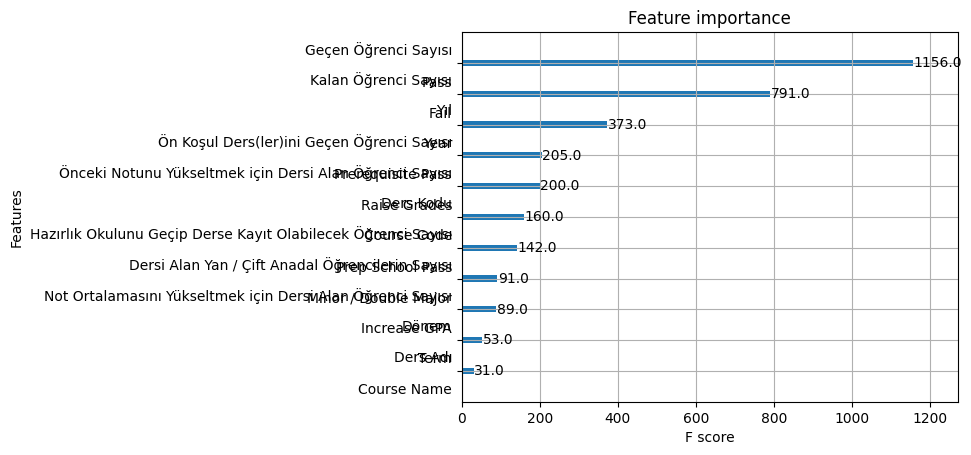

<Figure size 1600x1200 with 0 Axes>

In [15]:
# Show the feature importance
xgb.plot_importance(xgb_model)
plt.figure(figsize = (16, 12))
plt.show()

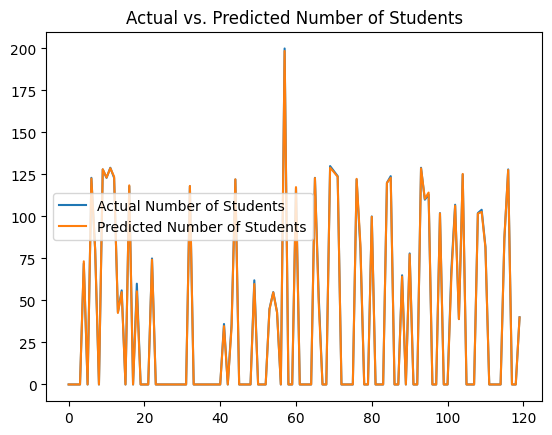

In [33]:
# Plot the predicted values against the actual values on a scatter plot
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Actual Number of Students")
plt.plot(x_ax, y_pred, label="Predicted Number of Students")
plt.title('Actual vs. Predicted Number of Students')
plt.legend()
plt.show() 
# It is overfit probably...